<a href="https://colab.research.google.com/github/luisantoniounocc/EXAMEN_FINAL_PRACTICO/blob/main/Examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install kagglehub pandas numpy scikit-learn torch torchvision torchaudio nltk scipy tensorflow keras matplotlib seaborn --quiet


In [70]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import describe

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
import os

# Cargar dataset desde Kaggle
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")
print("Ruta local:", path)

# List files in the downloaded directory to verify the CSV filename
print("Files in downloaded directory:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

# Cargar CSV al DataFrame
# Construct the correct path to the CSV file
csv_file_path = os.path.join(path, "Blood donor.csv")

# Check if the file exists before attempting to read
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    # Vista rápida
    print(df.head())
    print(df.info())
else:
    print(f"Error: The file '{csv_file_path}' was not found.")

Ruta local: /kaggle/input/blood-donor-dataset
Files in downloaded directory:
/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv
Error: The file '/kaggle/input/blood-donor-dataset/Blood donor.csv' was not found.


In [72]:
import os
import kagglehub
import pandas as pd
import numpy as np

# Reload the blood donor dataset to ensure df is correct
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")
csv_file_path = os.path.join(path, "blood_donor_dataset.csv") # Corrected filename
df = pd.read_csv(csv_file_path)

# Descripción estadística
print(df.describe())

# Reemplazo de valores nulos si los hay
df = df.fillna(0)

# Ejemplo de cálculo con Numpy
# Use the correct column name from the blood donor dataset if different
try:
    media = np.mean(df["Monetary (c.c. blood)"])
    desv = np.std(df["Monetary (c.c. blood)"])
    print("Media:", media, "Desviación estándar:", desv)
except KeyError as e:
    print(f"Error: Column {e} not found in the DataFrame.")
    print("Available columns are:", df.columns.tolist())

       months_since_first_donation  number_of_donation  pints_donated
count                 10000.000000        10000.000000   10000.000000
mean                     59.953100           25.128200      37.614000
std                      34.911379           14.654195      26.334072
min                       0.000000            0.000000       0.000000
25%                      30.000000           12.000000      16.000000
50%                      60.000000           26.000000      34.000000
75%                      90.000000           38.000000      50.000000
max                     120.000000           50.000000     100.000000
Error: Column 'Monetary (c.c. blood)' not found in the DataFrame.
Available columns are: ['donor_id', 'name', 'email', 'password', 'contact_number', 'city', 'blood_group', 'availability', 'months_since_first_donation', 'number_of_donation', 'pints_donated', 'created_at']


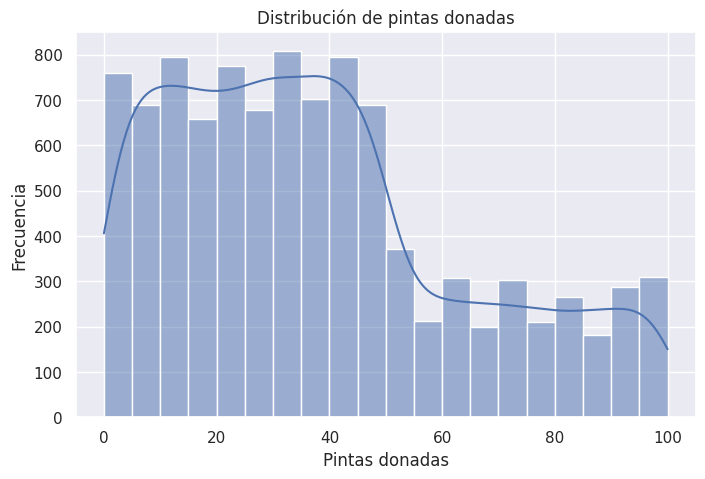

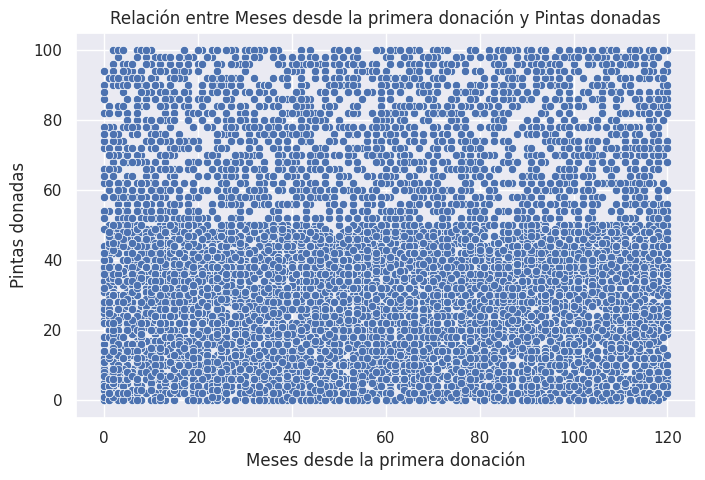

In [73]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the blood donor dataset to ensure df is correct
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")
csv_file_path = os.path.join(path, "blood_donor_dataset.csv") # Corrected filename
df = pd.read_csv(csv_file_path)

plt.figure(figsize=(8,5))
sns.histplot(df["pints_donated"], bins=20, kde=True)
plt.title("Distribución de pintas donadas")
plt.xlabel("Pintas donadas")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["months_since_first_donation"], y=df["pints_donated"]) # Assuming 'months_since_first_donation' is relevant for recency
plt.title("Relación entre Meses desde la primera donación y Pintas donadas")
plt.xlabel("Meses desde la primera donación")
plt.ylabel("Pintas donadas")
plt.show()

In [74]:
# Select relevant features from the blood donor dataset
X = df[["months_since_first_donation", "number_of_donation", "pints_donated"]]

# Define the target variable (assuming 'Made Donation in March 2007' is available or needs to be created)
# Based on the available columns, this target column is missing.
# You might need to load a different dataset version or define a new target based on existing columns.
# For example, you could predict 'availability' or create a binary target based on 'number_of_donation'.
# y = df["Made Donation in March 2007"] # This column is not in the current df

# *** IMPORTANT: Replace the line above with the correct definition of y based on your data ***
# Example if you want to predict 'availability' (assuming it's binary or can be made binary):
# y = df["availability"].apply(lambda x: 1 if x == 'Yes' else 0)


# Assuming y is now defined and has the same number of rows as X
# Split the data into training and testing sets
# Ensure X and y have the same number of samples after any potential filtering/cleaning
if len(X) == len(y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print(f"Error: Feature and target arrays have inconsistent numbers of samples. X has {len(X)} samples and y has {len(y)} samples.")

Accuracy: 0.504
Confusion Matrix:
[[   0  992]
 [   0 1008]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       992
           1       0.50      1.00      0.67      1008

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.34      2000
weighted avg       0.25      0.50      0.34      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
# CELDA PREVIA: División de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Definir variables de entrada (X) y salida (y)
# Use 'availability' as the target column as an example
X = df.drop("availability", axis=1)   # Drop the target column from features
y = df["availability"].apply(lambda x: 1 if x == 'Yes' else 0) # Define y (binary example)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [63]:
# CELDA 7: Conversión a tensores en PyTorch
import torch

# Select only numeric columns before converting to tensors
numeric_cols = ["months_since_first_donation", "number_of_donation", "pints_donated"]

X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]


X_torch = torch.tensor(X_train_numeric.values, dtype=torch.float32)
y_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)

In [76]:
# Ejemplo de análisis de sentimiento con NLTK
sia = SentimentIntensityAnalyzer()
texto = "La empresa tuvo un gran crecimiento en el último trimestre, pero existen riesgos financieros."
print("Análisis de sentimiento:", sia.polarity_scores(texto))

# Estadísticas básicas con SciPy
# Use the correct column name from the blood donor dataset
try:
    valores = df["number_of_donation"].values
    print("Stats SciPy:", describe(valores))
except KeyError as e:
    print(f"Error: Column {e} not found in the DataFrame.")
    print("Available columns are:", df.columns.tolist())

Análisis de sentimiento: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Stats SciPy: DescribeResult(nobs=np.int64(10000), minmax=(np.int64(0), np.int64(50)), mean=np.float64(25.1282), variance=np.float64(214.74543930393034), skewness=np.float64(-0.019639070113784064), kurtosis=np.float64(-1.192720763729546))


In [77]:
# Modelo secuencial para predecir tendencias (ejemplo con series temporales)

# Select only numeric columns from X_train and X_test
numeric_cols = ["months_since_first_donation", "number_of_donation", "pints_donated"]
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

model_dl = keras.Sequential([
    # Adjust input shape to match the number of numeric features (3)
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Use the numeric subsets for training and validation
history = model_dl.fit(X_train_numeric, y_train, epochs=20, batch_size=16, validation_data=(X_test_numeric, y_test))

# Evaluación
loss, acc = model_dl.evaluate(X_test_numeric, y_test)
print("Accuracy DL:", acc)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4981 - loss: 0.8215 - val_accuracy: 0.5095 - val_loss: 0.7054
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5005 - loss: 0.7200 - val_accuracy: 0.4995 - val_loss: 0.7466
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5042 - loss: 0.7127 - val_accuracy: 0.5160 - val_loss: 0.7410
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5004 - loss: 0.7062 - val_accuracy: 0.5040 - val_loss: 0.6999
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5096 - loss: 0.7025 - val_accuracy: 0.4975 - val_loss: 0.7112
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4920 - loss: 0.7099 - val_accuracy: 0.5110 - val_loss: 0.7004
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5107 - loss: 0.6980 - val_accuracy: 0.4985 - val_loss: 0.7027
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5008 - loss: 0.7011 - val_accuracy: 0.4950 - val_

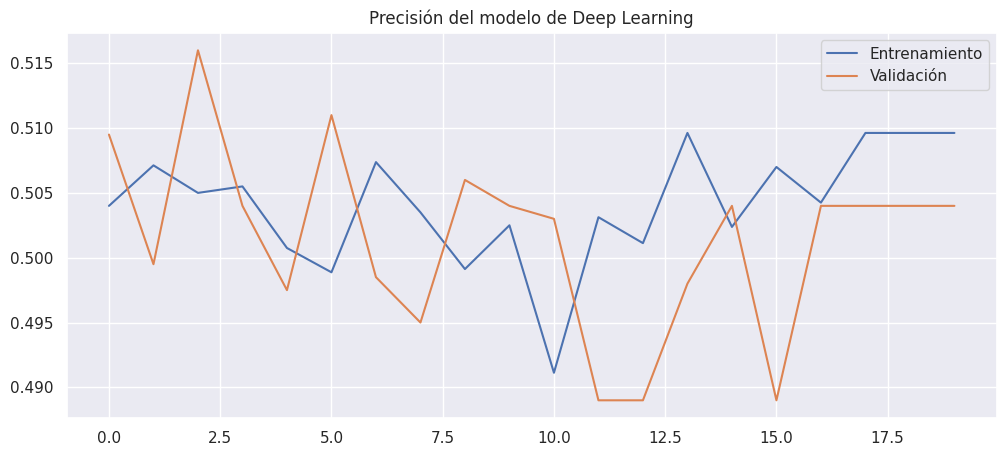

In [79]:
# Curva de entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title("Precisión del modelo de Deep Learning")
plt.show()
